In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as iter
from progressbar import ProgressBar

## Generator
- `p_comb` : P行列のパターン
- `a_comb` : フィルター値のパターン
- `binalize` : 計算結果を二値化するかどうか
- `threshold` : 二値化するときの閾値

/ |  #                                            | 22136 Elapsed Time: 0:00:00

1048576


/ |#                                            | 1046509 Elapsed Time: 0:00:09

CPU times: user 10.6 s, sys: 545 ms, total: 11.1 s
Wall time: 10.8 s


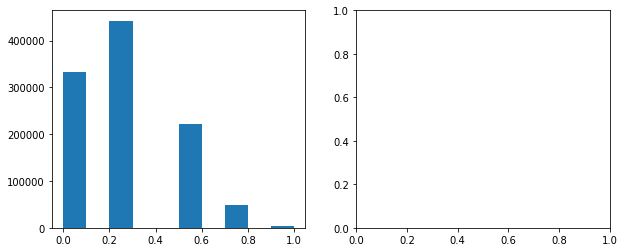

In [48]:
%%time
## INPUT
p_comb = [0, 1]
a_comb = [0, 1]
binalize = False
threshold = 0.5 #where val > threshold, then val = 1


total_comb = len( p_comb ) ** 16 * len( a_comb ) ** 4
print(total_comb)
p_matrix = np.empty((total_comb, 16), dtype='float16')
q_matrix = np.empty((total_comb, 9), dtype='float16')
count = 0
p = ProgressBar(total_comb)

for p_11, p_12, p_13, p_14, p_21, p_22, p_23, p_24, p_31, p_32, p_33, p_34, p_41, p_42, p_43, p_44 in iter.product(p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb):
    for a_11, a_12, a_21, a_22 in iter.product(a_comb, a_comb, a_comb, a_comb):
        q_matrix[count] = np.array([p_11 * a_11 + p_12 * a_12 + p_21 * a_21 + p_22 * a_22,
                                    p_12 * a_11 + p_13 * a_12 + p_22 * a_21 + p_23 * a_22,
                                    p_13 * a_11 + p_14 * a_12 + p_23 * a_21 + p_24 * a_22, 
                                    p_21 * a_11 + p_22 * a_12 + p_31 * a_21 + p_32 * a_22,
                                    p_22 * a_11 + p_23 * a_12 + p_32 * a_21 + p_33 * a_22,
                                    p_23 * a_11 + p_24 * a_12 + p_33 * a_21 + p_34 * a_22,
                                    p_31 * a_11 + p_32 * a_12 + p_41 * a_21 + p_42 * a_22,
                                    p_32 * a_11 + p_33 * a_12 + p_42 * a_21 + p_43 * a_22,
                                    p_33 * a_11 + p_34 * a_12 + p_43 * a_21 + p_44 * a_22
                                   ],
                                  dtype="float16")
        p_matrix[count] = np.array([p_11, p_12, p_13, p_14, p_21, p_22, p_23, p_24, p_31, p_32, p_33, p_34, p_41, p_42, p_43, p_44])
        count += 1
        p.update(count + 1)
q_matrix /= 4

## PLOTTING
fig, axes = plt.subplots(1,2, figsize = (10,4))
hist_data = [q_matrix[i][1] for i in range(q_matrix.shape[0])]
axes[0].hist(hist_data)
if binalize == True:
    q_matrix[q_matrix < threshold] = 0
    q_matrix[q_matrix >= threshold] = 1
    hist_data_binalize = [q_matrix[i][1] for i in range(q_matrix.shape[0])]
    axes[1].hist(hist_data_binalize)
    
np.savez_compressed('4x4matrix', p_matrix = p_matrix, q_matrix = q_matrix)

## Generator with stochastic A filter

| | #                                             | 14083 Elapsed Time: 0:00:00

3145728


/ |                #                            | 3141929 Elapsed Time: 0:00:28

CPU times: user 32.6 s, sys: 2.38 s, total: 35 s
Wall time: 33.4 s


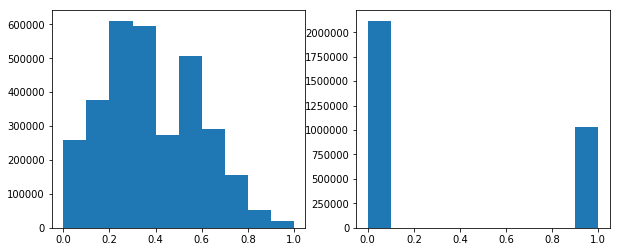

In [89]:
%%time
## INPUT
p_comb = [0, 1]
mean = 0
sd = 0.1
cycle = 3
binalize = True
threshold = 0.5 #where val > threshold, then val = 1


total_comb = len( p_comb ) ** 16 * ( len( a_comb ) ** 4 * cycle )
print(total_comb)
p_matrix = np.empty((total_comb, 16), dtype='int8')
q_matrix = np.empty((total_comb, 9), dtype='float16')
count = 0
p = ProgressBar(total_comb)

for p_11, p_12, p_13, p_14, p_21, p_22, p_23, p_24, p_31, p_32, p_33, p_34, p_41, p_42, p_43, p_44 in iter.product(p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb):
    for i in range(cycle):
        a_comb = [0.5 + np.random.normal(mean, sd) , 1]
        for a_11, a_12, a_21, a_22 in iter.product(a_comb, a_comb, a_comb, a_comb):
            q_matrix[count] = np.array([p_11 * a_11 + p_12 * a_12 + p_21 * a_21 + p_22 * a_22,
                                        p_12 * a_11 + p_13 * a_12 + p_22 * a_21 + p_23 * a_22,
                                        p_13 * a_11 + p_14 * a_12 + p_23 * a_21 + p_24 * a_22, 
                                        p_21 * a_11 + p_22 * a_12 + p_31 * a_21 + p_32 * a_22,
                                        p_22 * a_11 + p_23 * a_12 + p_32 * a_21 + p_33 * a_22,
                                        p_23 * a_11 + p_24 * a_12 + p_33 * a_21 + p_34 * a_22,
                                        p_31 * a_11 + p_32 * a_12 + p_41 * a_21 + p_42 * a_22,
                                        p_32 * a_11 + p_33 * a_12 + p_42 * a_21 + p_43 * a_22,
                                        p_33 * a_11 + p_34 * a_12 + p_43 * a_21 + p_44 * a_22
                                       ],
                                      dtype="float16")
            p_matrix[count] = np.array([p_11, p_12, p_13, p_14, p_21, p_22, p_23, p_24, p_31, p_32, p_33, p_34, p_41, p_42, p_43, p_44])
            count += 1
            p.update(count + 1)
q_matrix /= 4

## PLOTTING
fig, axes = plt.subplots(1,2, figsize = (10,4))
hist_data = [q_matrix[i][1] for i in range(q_matrix.shape[0])]
axes[0].hist(hist_data)
if binalize == True:
    q_matrix[q_matrix < threshold] = 0
    q_matrix[q_matrix >= threshold] = 1
    hist_data_binalize = [q_matrix[i][1] for i in range(q_matrix.shape[0])]
    axes[1].hist(hist_data_binalize)
    
np.savez_compressed('4x4matrix', p_matrix = p_matrix, q_matrix = q_matrix)

## Generator for CNN
出力を三次元に拡張したもの

/ |  #                                            | 17923 Elapsed Time: 0:00:00

65536


\ |       #                                       | 61725 Elapsed Time: 0:00:00

CPU times: user 923 ms, sys: 62 ms, total: 985 ms
Wall time: 936 ms


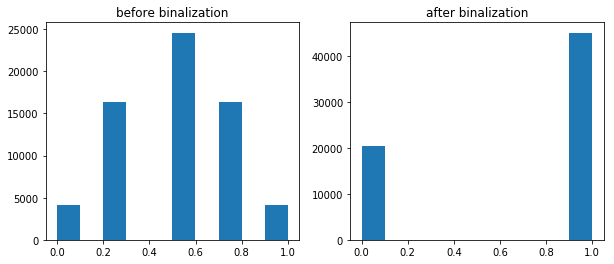

In [44]:
%%time
## INPUT
p_comb = [0, 1]
a_comb = [1]
binalize = True
threshold = 0.5 #where val > threshold, then val = 1


total_comb = len( p_comb ) ** 16 * len( a_comb ) ** 4
print(total_comb)
p_matrix = np.empty((total_comb,4,4,1), dtype='float16')
q_matrix = np.empty((total_comb,3,3,1), dtype='float16')
count = 0
p = ProgressBar(total_comb)

for p_11, p_12, p_13, p_14, p_21, p_22, p_23, p_24, p_31, p_32, p_33, p_34, p_41, p_42, p_43, p_44 in iter.product(p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb):
    for a_11, a_12, a_21, a_22 in iter.product(a_comb, a_comb, a_comb, a_comb):
        q_matrix[count, : , : , : ] = np.array(
            [[p_11 * a_11 + p_12 * a_12 + p_21 * a_21 + p_22 * a_22,
              p_12 * a_11 + p_13 * a_12 + p_22 * a_21 + p_23 * a_22,
              p_13 * a_11 + p_14 * a_12 + p_23 * a_21 + p_24 * a_22],
              [p_21 * a_11 + p_22 * a_12 + p_31 * a_21 + p_32 * a_22,
              p_22 * a_11 + p_23 * a_12 + p_32 * a_21 + p_33 * a_22,
              p_23 * a_11 + p_24 * a_12 + p_33 * a_21 + p_34 * a_22],
              [p_31 * a_11 + p_32 * a_12 + p_41 * a_21 + p_42 * a_22,
              p_32 * a_11 + p_33 * a_12 + p_42 * a_21 + p_43 * a_22,
              p_33 * a_11 + p_34 * a_12 + p_43 * a_21 + p_44 * a_22
                                   ]]).reshape(3,3,1)
        p_matrix[count, : , : , : ] = np.array([[p_11, p_12, p_13, p_14], [p_21, p_22, p_23, p_24], [p_31, p_32, p_33, p_34], [p_41, p_42, p_43, p_44]]).reshape(4,4,1)
        count += 1
        p.update(count + 1)
q_matrix /= 4

## PLOTTING
fig, axes = plt.subplots(1,2, figsize = (10,4))
hist_data = [q_matrix[i,0,0,0] for i in range(q_matrix.shape[0])]
axes[0].hist(hist_data)
axes[0].set_title("before binalization")
if binalize == True:
    q_matrix[q_matrix < threshold] = 0
    q_matrix[q_matrix >= threshold] = 1
    hist_data_binalize = [q_matrix[i,0,0,0] for i in range(q_matrix.shape[0])]
    axes[1].hist(hist_data_binalize)
    axes[1].set_title("after binalization")
np.savez_compressed('4x4matrix_cnn', p_matrix = p_matrix, q_matrix = q_matrix)

## Matrix Approach(開発途中)

/ |  #                                             | 6059 Elapsed Time: 0:00:00

Total Combination : 1048576


\ |                                      #      | 1048208 Elapsed Time: 0:00:32

CPU times: user 33.9 s, sys: 455 ms, total: 34.4 s
Wall time: 34.2 s


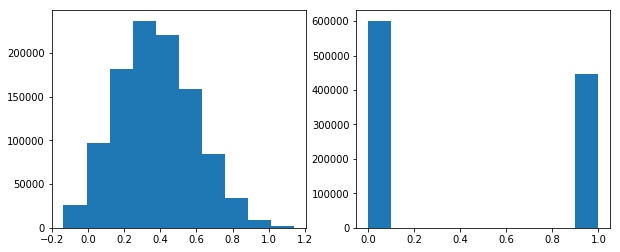

In [7]:
%%time
## INPUT
p_comb = [0, 1]
a_comb = [0.5, 1]

## Setting a gaussian noise params
## used in a-filter elements except a_comb
add_noise = True
mean = 0
sd = 0.05

# if True, then all q_matrix elements will be binalized.
binalize = True
threshold = 0.4 #where val > threshold, then val = 1


total_comb = len( p_comb ) ** 16 * len( a_comb ) ** 4
print("Total Combination : {}".format(total_comb))

## Initializing p_matrix and q_matrix
p_matrix = np.empty((total_comb, 16), dtype='float16')
q_matrix = np.empty((total_comb, 9), dtype='float16')

## Params for showing up a process
count = 0
p = ProgressBar(total_comb)

for p_11, p_12, p_13, p_14, p_21, p_22, p_23, p_24, p_31, p_32, p_33, p_34, p_41, p_42, p_43, p_44 in iter.product(p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb):
    for a_11, a_12, a_21, a_22 in iter.product(a_comb, a_comb, a_comb, a_comb):
        p_matrix[count] = np.array([p_11, p_12, p_13, p_14, p_21, p_22, p_23, p_24, p_31, p_32, p_33, p_34, p_41, p_42, p_43, p_44])
        a_filter = np.array([
            [a_11, a_12, 0, 0, a_21, a_22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, a_11, a_12, 0, 0, a_21, a_22, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, a_11, a_12, 0, 0, a_21, a_22, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, a_11, a_12, 0, 0, a_21, a_22, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, a_11, a_12, 0, 0, a_21, a_22, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, a_11, a_12, 0, 0, a_21, a_22, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, a_11, a_12, 0, 0, a_21, a_22, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, a_11, a_12, 0, 0, a_21, a_22, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, a_11, a_12, 0, 0, a_21, a_22]
        ], dtype="float16")
        if add_noise:
            noise = np.random.normal(mean, sd, (9, 16))
            a_filter += noise
        q_matrix[count] = np.dot(a_filter, p_matrix[count])

        count += 1
        p.update(count + 1)
q_matrix /= 4

## PLOTTING
fig, axes = plt.subplots(1,2, figsize = (10,4))
hist_data = [q_matrix[i][1] for i in range(q_matrix.shape[0])]
axes[0].hist(hist_data)
if binalize == True:
    q_matrix[q_matrix < threshold] = 0
    q_matrix[q_matrix >= threshold] = 1
    hist_data_binalize = [q_matrix[i][1] for i in range(q_matrix.shape[0])]
    axes[1].hist(hist_data_binalize)
    
np.savez_compressed('4x4matrix', p_matrix = p_matrix, q_matrix = q_matrix)

## Saving as 4x4matrix.npz

In [19]:
%time np.savez_compressed('4x4matrix', p_matrix = p_matrix, q_matrix = q_matrix)

CPU times: user 761 ms, sys: 13.5 ms, total: 775 ms
Wall time: 778 ms


(array([11., 16., 12., 17., 13., 16.,  9.,  3.,  2.,  1.]),
 array([-0.09131824, -0.06754641, -0.04377458, -0.02000275,  0.00376909,
         0.02754092,  0.05131275,  0.07508458,  0.09885642,  0.12262825,
         0.14640008]),
 <a list of 10 Patch objects>)

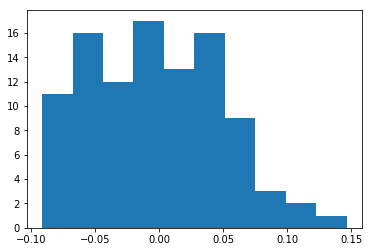

In [98]:
mean = 0
sd = 0.05
plt.hist([np.random.normal(mean,sd,100)])

In [91]:
np.dot?